In [1]:
from setup import *

import matplotlib.pyplot as plt
import numpy as np
from omegaconf import OmegaConf
import pandas as pd
import pickle as pkl
from sklearn.metrics import r2_score


In [3]:
# version = ['2023-07-01T01-02-43',
#            '2023-06-28T22-03-37',
#            '2023-06-30T01-32-58']
# epoch = [670,160,88]

version = [
    "2023-07-01T00-44-09",
    "2023-07-04T15-26-35",
    "2023-06-27T20-57-11",
    "2023-07-01T02-22-28",
    "2023-06-28T21-02-28"
]

epoch = [
    60,
    34,
    62,
    69,
    70
]

In [9]:
fit = []
lambdas = []

for v, e in zip(version, epoch):
    ckpt = '/dreambig/qingyi/stable-diffusion/logs/'+v+'_sae_kl_8x8x64/checkpoints/epoch='+f"{e:06d}"+'.ckpt'

    config = OmegaConf.load('/dreambig/qingyi/stable-diffusion/logs/'+v+'_sae_kl_8x8x64/configs/'+v+'-project.yaml')

    with open(proj_dir+"latent_space/"+v+"_sae_kl_f32_ep"+f"{e:06d}".lstrip('0')+".pkl", "rb") as f:
#     with open(proj_dir+"latent_space/"+v+"_sae_"+
#           str(config['model']['params']['ddconfig']['output_dim'])+"_"+
#           str(config['model']['params']['lossconfig']['params']['supervision_factor'])+
#           "_ep"+str(e)+".pkl", "rb") as f:
        pkl.load(f)
        pkl.load(f)
        pkl.load(f)
        sup_true_list = pkl.load(f)
        sup_list = pkl.load(f)

    sup_true_list = np.concatenate(sup_true_list)
    sup_list = np.concatenate(sup_list)

    sup_true_list = sup_true_list[:3176]
    sup_list = sup_list[:3176]

    r2 = r2_score(sup_true_list, sup_list, multioutput='raw_values')
    fit.append(r2)
    if "supervision_factor" in config['model']['params']['lossconfig']['params'].keys():
        lambdas.append(config['model']['params']['lossconfig']['params']['supervision_factor'])
    else:
        lambdas.append(0.5)

In [10]:
xlabels = ['pop density','pct25-34yrs','pct35-50yrs','pct over65yrs',
                 'pct white','pct non-white','pct black',
                 'pct col grad','avg tt to work','income']

In [11]:
cmap = plt.get_cmap('YlGnBu')

colors = cmap(np.linspace(0.25,0.75,5))

In [12]:
fit = pd.DataFrame(fit, columns=xlabels)
fit = fit.set_index(pd.Index(lambdas))

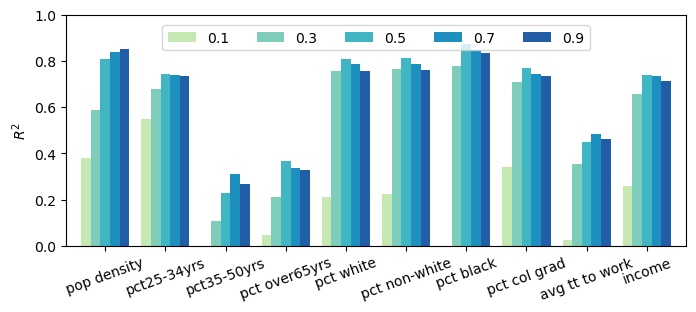

In [33]:
fig, ax = plt.subplots(figsize=(8,3))
fit.sort_index().T.plot.bar(ax=ax, color=colors, width=0.8)
ax.legend(ncol = 5, loc='center', bbox_to_anchor=(0.5,0.9))
ax.set_ylabel("$R^2$")
ax.set_ylim([0,1])
ax.set_xticklabels(xlabels, rotation=20)
fig.savefig(out_dir+"lambda_effect.png", bbox_inches='tight')